In [44]:
import future
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 6

Populating the interactive namespace from numpy and matplotlib


Slides from 2017 - need to be updated!

# Pandas

A Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing CSV, xls, HDF5, etc.
* Handles *messy* data
* Easy selection based on (categorical) values


# Pandas - Dataframes 

In [45]:
import pandas as pd
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [46]:
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Pandas - access data

In [47]:
print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [48]:
print(tips['day'])

0       Sun
1       Sun
2       Sun
       ... 
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]


In [50]:
display(tips[tips['day']=='Sat']) 

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Pandas - access data

* Get all data for smokers
* Get all tips for smokers

In [74]:
display(tips[tips['smoker']=='Yes'])

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [75]:
display(tips[tips['smoker']=='Yes']['tip'])

56     3.00
58     1.76
60     3.21
       ... 
237    1.17
240    2.00
241    2.00
Name: tip, Length: 93, dtype: float64

# Pandas - accessing data

* You can combine multiple conditions: 
    * and: `df[(df['x']=='y')&(df['y']=='x')]`
    * or: `df[(df['x']=='y')|(df['y']=='x')]`
* Get the tips for all female guests that ate by themselves or with at least 5 people

In [81]:
tips[(tips['sex']=='Female')&((tips['size']==1)|(tips['size']>4))]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
125,29.80,4.20,Female,No,Thur,Lunch,6
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


# Pandas - statistics

* You can compute the mean of a DataFrame with `df.mean`:

In [98]:
print(tips['tip'].mean())
print(tips.mean())

2.99827868852459
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64


* Try out `df.std`, `df.var`, `df.min`, `df.sum` and explain the output

In [91]:
#tips.std()
#tips.var()
#tips.min()
#tips.sum

# Pandas - statistics

* You can apply the statistics on a selection of the data:
* Get mean and standard deviation of the tips for smokers that had dinner with at least 4 people

In [96]:
display(tips[(tips['smoker']=='Yes')&(tips['time']=='Dinner')&(tips['size']>3)].mean())
display(tips[(tips['smoker']=='Yes')&(tips['time']=='Dinner')&(tips['size']>3)].std())

total_bill    30.151818
tip            3.629091
size           4.181818
dtype: float64

total_bill    7.108936
tip           1.363939
size          0.404520
dtype: float64

# Pandas - data I/O - read excel

* Sometimes, you get data in excel files
* Pandas has a function to read this: `pd.read_excel`
* Use `read_excel` to load `test.csv`

In [68]:
pd.read_excel('test.xls')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Pandas - access data

* Find all unique group sizes
* Print the total bill and tip for groups of size 2

In [51]:
print(tips['size'].unique())

[2 3 4 1 6 5]


In [52]:
print(tips[tips['size']==2]['total_bill'])

0      16.99
3      23.68
6       8.77
       ...  
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 156, dtype: float64


In [63]:
print(tips[tips['size']==2]['tip'])

0      1.01
3      3.31
6      2.00
       ... 
241    2.00
242    1.75
243    3.00
Name: tip, Length: 156, dtype: float64


# Pandas - data I/O - plain text output

* Write dataframe to file: `DataFrame.to_csv`:

In [64]:
tips.to_csv('tips.csv')
!head tips.csv --lines=3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Use the help to find out how you can make output like this:

```
total_bill	tip	sex	smoker	day	time	size
16.99	1.01	Female	No	Sun	Dinner	2
10.34	1.66	Male	No	Sun	Dinner	3
```

In [65]:
tips.to_csv('tips.csv',sep='\t',index=False)
!head tips.csv --lines=3

total_bill	tip	sex	smoker	day	time	size
16.99	1.01	Female	No	Sun	Dinner	2
10.34	1.66	Male	No	Sun	Dinner	3


# Pandas - data I/O - excel

* You can write data to excel files with `DataFrame.to_excel`
* Use `to_excel` to create an excel file of with the data in tips:
    * stored in a sheet named 'tips'
    * without the indices in the first column

In [66]:
tips.to_excel('test.xls',index=False,sheet_name='tips')

# Pandas - data I/O - read plain text

* Write dataframe to file: `df = pd.read_csv(fn)`
* Try the following:

In [ ]:
pd.read_csv('tips.csv')

* Look at the documentation of `pd.read_csv` and find out how to correctly read `tips.csv`.

# Pandas - data I/O - excel

* You can write data to excel files with `DataFrame.to_excel`
* Use `to_excel` to create an excel file of with the data in tips:
    * stored in a sheet named 'tips'
    * without the indices in the first column

In [66]:
tips.to_excel('test.xls',index=False,sheet_name='tips')

# Pandas - data I/O - read plain text

* Write dataframe to file: `df = pd.read_csv(fn)`
* Try the following:

In [ ]:
pd.read_csv('tips.csv')

* Look at the documentation of `pd.read_csv` and find out how to correctly read `tips.csv`.

# Pandas - data I/O - read excel

* Sometimes, you get data in excel files
* Pandas has a function to read this: `pd.read_excel`
* Use `read_excel` to load `test.csv`

In [68]:
pd.read_excel('test.xls')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Pandas - plotting

* Brief example, move to seaborn

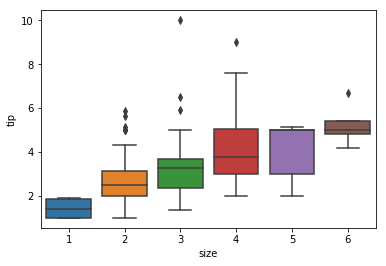

In [100]:
import seaborn as sns

sns.boxplot(data=tips,x='size',y='tip');

# Plotting with Pandas and Seaborn

Use the help function to recreate the plot below:

```
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
sns.heatmap(z,ax=ax)
```

In [ ]:
def plot_nice_heatmap():
    x = np.linspace(-1,1,11)
    y = np.linspace(-1,1,11)
    X, Y = np.meshgrid(x, y)
    z = X*X+Y*Y
    fig = plt.figure(figsize=(7,7))
    ax = plt.gca()
    sns.heatmap(z,ax=ax,linewidths=.1,annot=True,xticklabels=x,
                yticklabels=y,cbar=False)
    ax.set(xlabel='x',ylabel='y',title='Nice heatmap')

In [ ]:
plot_nice_heatmap()


# Data visualization - better heatmaps with Seaborn

In [ ]:
import seaborn as sns
x = np.linspace(-1,1,11)
y = np.linspace(-1,1,11)
X, Y = np.meshgrid(x, y)
z = X*X+Y*Y
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
sns.heatmap(z,ax=ax,linewidths=.1,annot=True,xticklabels=x,
            yticklabels=y,cbar=False)
ax.set(xlabel='x',ylabel='y',title='Nice heatmap')

# Data visualization - distributions

In [ ]:
import seaborn as sns

sample1 = np.random.normal(0,0.5,250)
sample2 = np.random.normal(0,0.6,250)
sample3 = np.random.normal(0.5,0.5,250)

fig = plt.figure(figsize=(6,6))
ax = plt.gca()
sns.boxplot(data=[sample1,sample2,sample3],ax=ax);

Create better visualizations with `sns.boxplot`, `sns.stripplot`, `sns.violinplot`, and `sns.swarmplot`

# Pandas - plotting with Seaborn

* Pandas had it's own plotting functions, but Seaborn's are much better

/home/mpalm/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mpalm/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mpalm/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


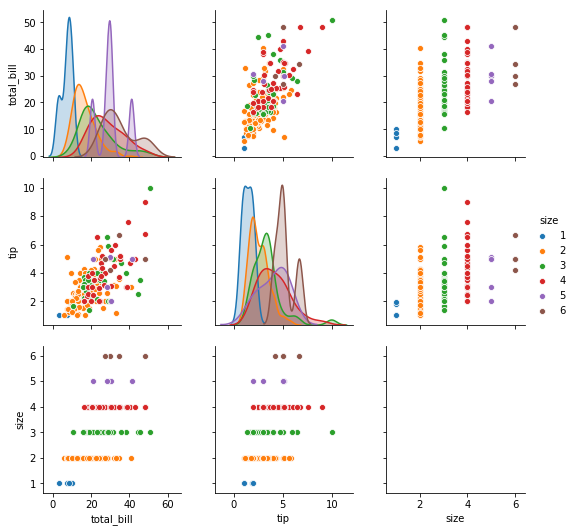

In [54]:
sns.pairplot(tips,hue='size')

# Pandas - plotting with Seaborn

Extend the `sns.pairplot(tips)` command so you can separate observations based on sex, group size, or day.

/home/mpalm/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


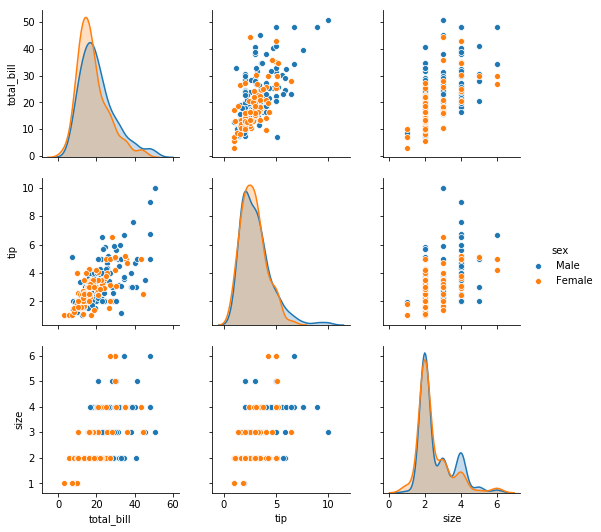

In [55]:
sns.pairplot(tips,hue='sex')

# Pandas - plotting with Seaborn

* The aforementioned plotting functions, `sns.boxplot`, `sns.stripplot`, `sns.violinplot`, and `sns.swarplot`, also work with this dataset.
* Create one such plot where you plot the tip size, for each sex and each day in one plot.

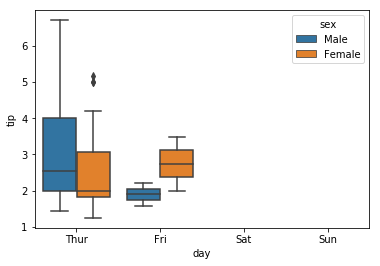

In [56]:
sns.boxplot(data=tips[tips['time']=='Lunch'],x='day',y='tip',hue='sex')
#sns.violinplot(data=tips,x='day',y='tip',hue='sex',split=True)